In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller


In [3]:
df = pd.read_csv("../data/BrentOilPrices.csv")

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df.set_index('Date')

df.head()


C:\Users\Hanan\AppData\Local\Temp\ipykernel_18236\612709343.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [4]:
df.info()
df.describe()
df.isna().sum()


<class 'pandas.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9011 non-null   float64
dtypes: float64(1)
memory usage: 140.8 KB


Price    0
dtype: int64

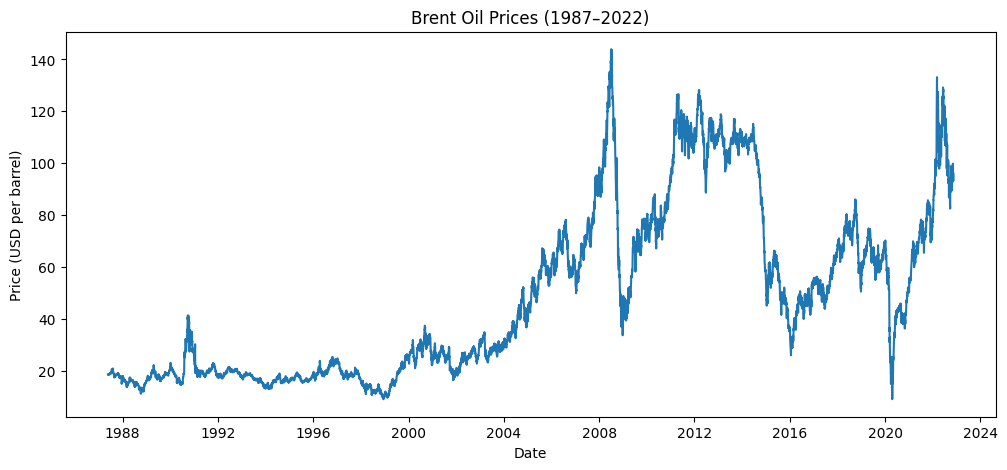

In [5]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Price'])
plt.title("Brent Oil Prices (1987–2022)")
plt.xlabel("Date")
plt.ylabel("Price (USD per barrel)")
plt.show()


In [6]:
df['log_return'] = np.log(df['Price']) - np.log(df['Price'].shift(1))
df = df.dropna()


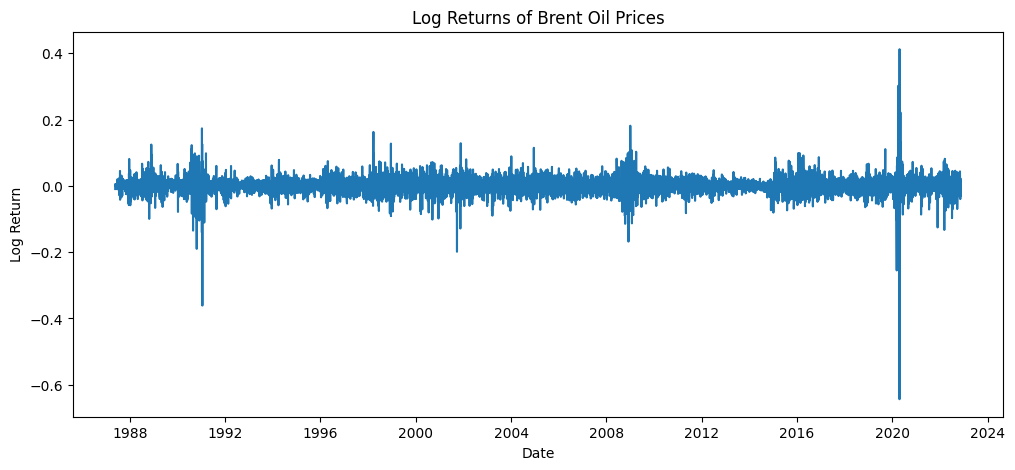

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['log_return'])
plt.title("Log Returns of Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.show()


In [8]:
adf_result = adfuller(df['log_return'])

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -16.427113494485894
p-value: 2.4985801611428892e-29


In [14]:
def load_price_data(filepath):
    try:
        df = pd.read_csv(filepath)
        required_cols = {"Date", "Price"}
        if not required_cols.issubset(df.columns):
            raise ValueError("Dataset must contain Date and Price columns.")
        df["Date"] = pd.to_datetime(df["Date"])
        df = df.sort_values("Date").set_index("Date")
        return df
    except Exception as e:
        raise RuntimeError(f"Error loading data: {e}")


In [15]:
def compute_log_returns(df, price_col="Price"):
    if price_col not in df.columns:
        raise ValueError(f"{price_col} column not found.")
    log_returns = np.log(df[price_col]) - np.log(df[price_col].shift(1))
    return log_returns.dropna()


In [16]:
def plot_rolling_volatility(series, window=30):
    rolling_vol = series.rolling(window).std()
    plt.figure(figsize=(12,5))
    plt.plot(rolling_vol)
    plt.title(f"{window}-Day Rolling Volatility of Log Returns")
    plt.xlabel("Date")
    plt.ylabel("Volatility")
    plt.show()


In [17]:
def adf_test(series):
    result = adfuller(series)
    return {
        "ADF Statistic": result[0],
        "p-value": result[1]
    }


{'ADF Statistic': np.float64(-16.427113494485894), 'p-value': np.float64(2.4985801611428892e-29)}


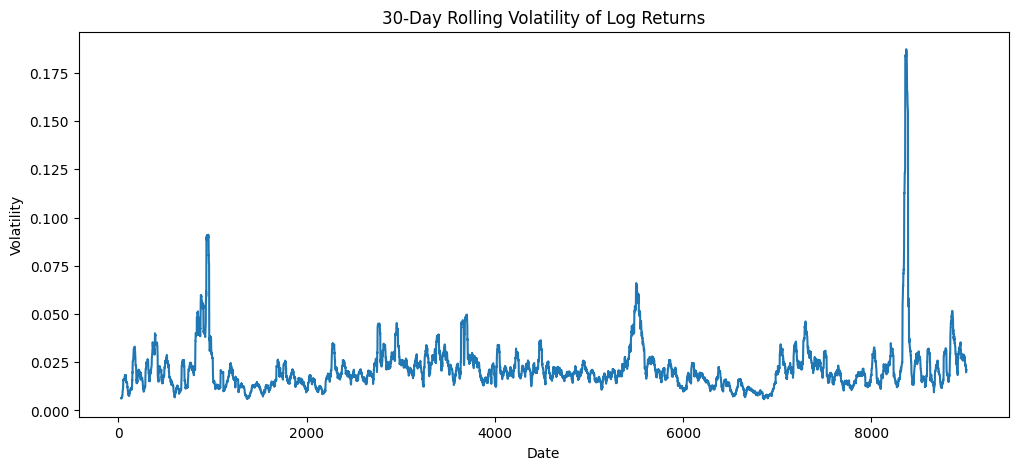

In [18]:
df = pd.read_csv("../data/BrentOilPrices.csv")

log_returns = compute_log_returns(df)

adf_results = adf_test(log_returns)
print(adf_results)

plot_rolling_volatility(log_returns)


The analysis has been modularized into reusable functions to improve clarity, reproducibility, and maintainability. This structure supports extension into Bayesian change point modeling in subsequent tasks and aligns with professional data science coding practices.
